In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

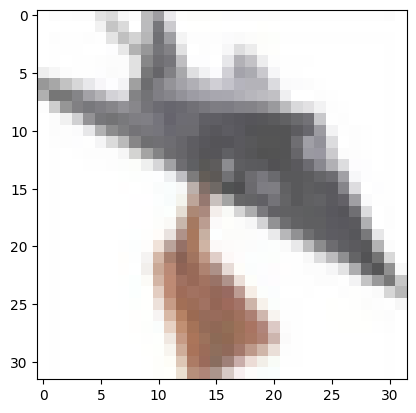

In [5]:
plt.imshow(x_test[215])

# L1, L2 test

In [6]:
batch_size = 256

In [7]:
model_cnn_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model_cnn_0.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [9]:
history_cnn_0 = model_cnn_0.fit(x_train, y_train, epochs=10, 
                                validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6662 - sparse_categorical_accuracy: 0.3709 - val_loss: 1.4394 - val_sparse_categorical_accuracy: 0.4765
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1764 - sparse_categorical_accuracy: 0.5760 - val_loss: 1.0591 - val_sparse_categorical_accuracy: 0.6261
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9660 - sparse_categorical_accuracy: 0.6588 - val_loss: 0.9194 - val_sparse_categorical_accuracy: 0.6819
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8212 - sparse_categorical_accuracy: 0.7092 - val_loss: 0.9338 - val_sparse_categorical_accuracy: 0.6689
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.7202 - sparse_categorical_accuracy: 0.7480 - val_loss: 0.8096 - val_sparse_categorical_accuracy: 0.7283
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.

In [10]:
model_cnn_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model_cnn_1.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [12]:
history_cnn_1 = model_cnn_1.fit(x_train, y_train, 
                                                            epochs=10,
                                                              validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 80s 51ms/step - loss: 3.2345 - sparse_categorical_accuracy: 0.0983 - val_loss: 2.4639 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 2.4640 - sparse_categorical_accuracy: 0.0988 - val_loss: 2.4643 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 2.4641 - sparse_categorical_accuracy: 0.0971 - val_loss: 2.4624 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 2.4641 - sparse_categorical_accuracy: 0.0991 - val_loss: 2.4650 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 2.4641 - sparse_categorical_accuracy: 0.0971 - val_loss: 2.4646 - val_sparse_categorical_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 2.

In [13]:
model_cnn_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
model_cnn_2.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [15]:
history_cnn_2 = model_cnn_2.fit(x_train, y_train, 
                                                                epochs=10,
                                                                 validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.8306 - sparse_categorical_accuracy: 0.3089 - val_loss: 1.5267 - val_sparse_categorical_accuracy: 0.4361
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.3221 - sparse_categorical_accuracy: 0.5233 - val_loss: 1.1694 - val_sparse_categorical_accuracy: 0.5857
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0707 - sparse_categorical_accuracy: 0.6204 - val_loss: 1.1817 - val_sparse_categorical_accuracy: 0.6037
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9112 - sparse_categorical_accuracy: 0.6843 - val_loss: 0.8840 - val_sparse_categorical_accuracy: 0.6961
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7932 - sparse_categorical_accuracy: 0.7291 - val_loss: 0.8044 - val_sparse_categorical_accuracy: 0.7275
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.

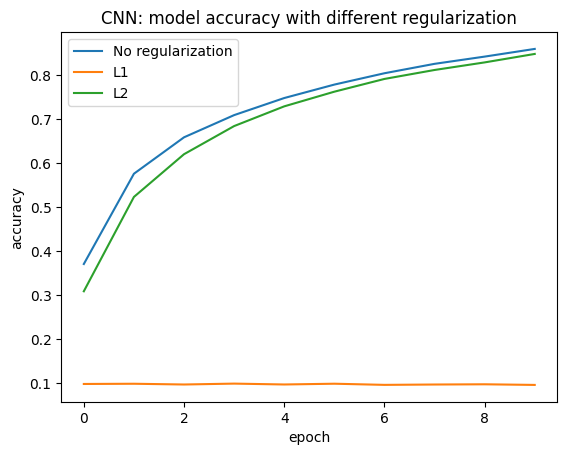

In [16]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_0.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_1.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_2.history['sparse_categorical_accuracy'])
plt.title('CNN: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['No regularization', 'L1', 'L2'], loc='upper left')
plt.show()

# Dropout test

In [25]:
model_cnn_2_drop = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.2,noise_shape=None,seed=None),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.2,noise_shape=None,seed=None),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [26]:
model_cnn_2_drop.compile(loss="sparse_categorical_crossentropy", 
                    optimizer="Adam", 
                    metrics=["sparse_categorical_accuracy"])

In [27]:
history_cnn_2_drop = model_cnn_2_drop.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.6823 - sparse_categorical_accuracy: 0.3631 - val_loss: 1.4142 - val_sparse_categorical_accuracy: 0.4847
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1869 - sparse_categorical_accuracy: 0.5694 - val_loss: 1.0390 - val_sparse_categorical_accuracy: 0.6271
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9730 - sparse_categorical_accuracy: 0.6535 - val_loss: 0.9366 - val_sparse_categorical_accuracy: 0.6706
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8425 - sparse_categorical_accuracy: 0.7033 - val_loss: 0.8683 - val_sparse_categorical_accuracy: 0.7025
Epoch 5/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7582 - sparse_categorical_accuracy: 0.7348 - val_loss: 0.7820 - val_sparse_categorical_accuracy: 0.7317
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.

In [28]:
# model_cnn_2_nodrop = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]),
#     tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
#     tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
#     tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
#     tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding="same", activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=128,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))
# ])

In [29]:
# model_cnn_2_nodrop.compile(loss="sparse_categorical_crossentropy", 
#                     optimizer="Adam", 
#                     metrics=["sparse_categorical_accuracy"])

In [30]:
# history_cnn_2_nodrop = model_cnn_2_nodrop.fit(x_train, y_train, epochs=20,   validation_data=(x_test,y_test))

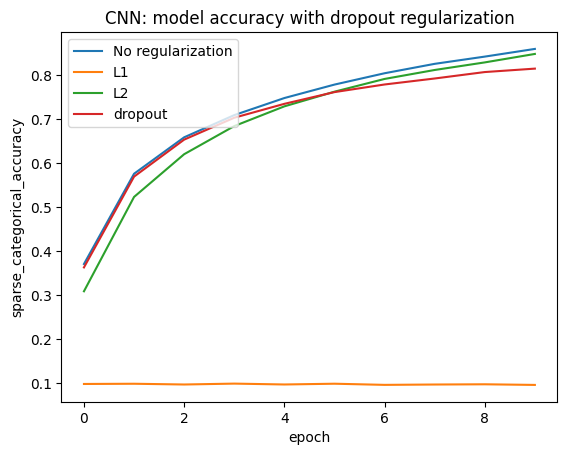

In [31]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_0.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_1.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_2.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_2_drop.history['sparse_categorical_accuracy'])
plt.title('CNN: model accuracy with dropout regularization')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['No regularization', 'L1', 'L2', 'dropout'], loc='upper left')
plt.show()

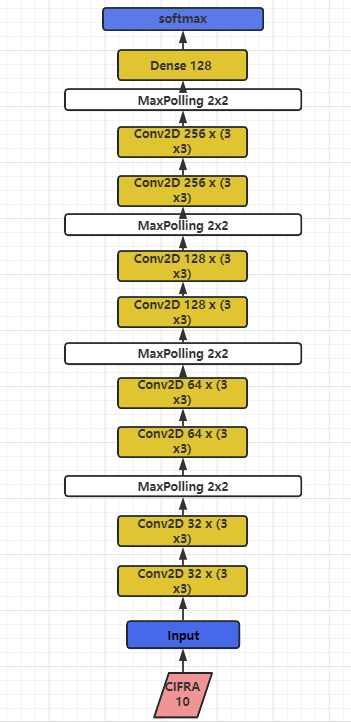

In [32]:
history_cnn_0.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

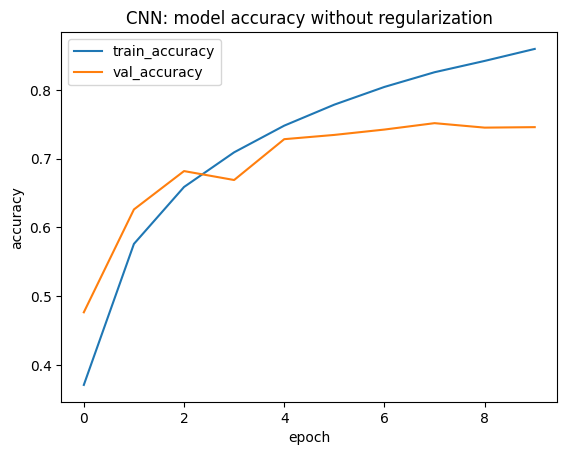

In [34]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_0.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_0.history['val_sparse_categorical_accuracy'])
plt.title('CNN: model accuracy without regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

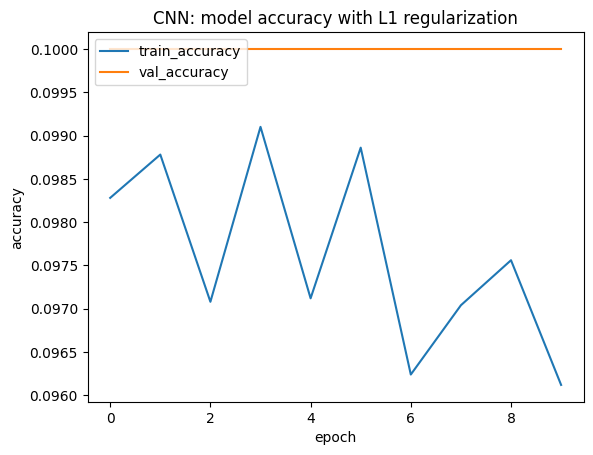

In [35]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_1.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_1.history['val_sparse_categorical_accuracy'])
plt.title('CNN: model accuracy with L1 regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

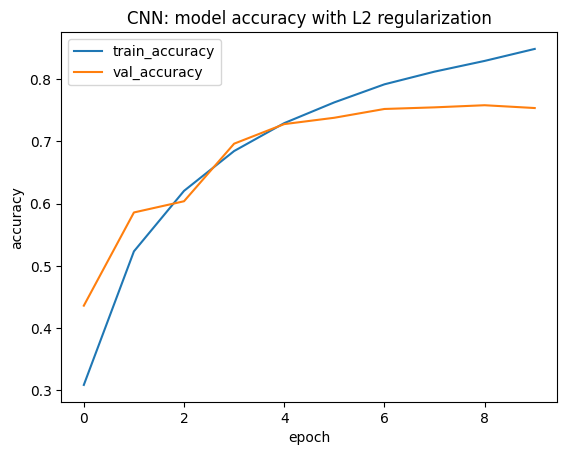

In [36]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_2.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_2.history['val_sparse_categorical_accuracy'])
plt.title('CNN: model accuracy with L2 regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

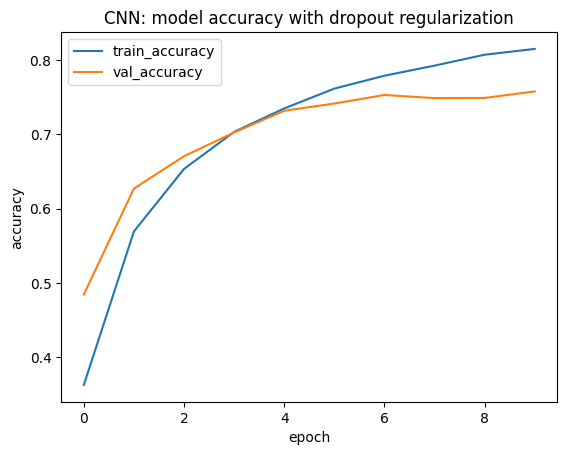

In [37]:
import matplotlib.pyplot as plt
plt.plot(history_cnn_2_drop.history['sparse_categorical_accuracy'])
plt.plot(history_cnn_2_drop.history['val_sparse_categorical_accuracy'])
plt.title('CNN: model accuracy with dropout regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()